Visualization saved to twitter_geographical_distribution_rounded.png


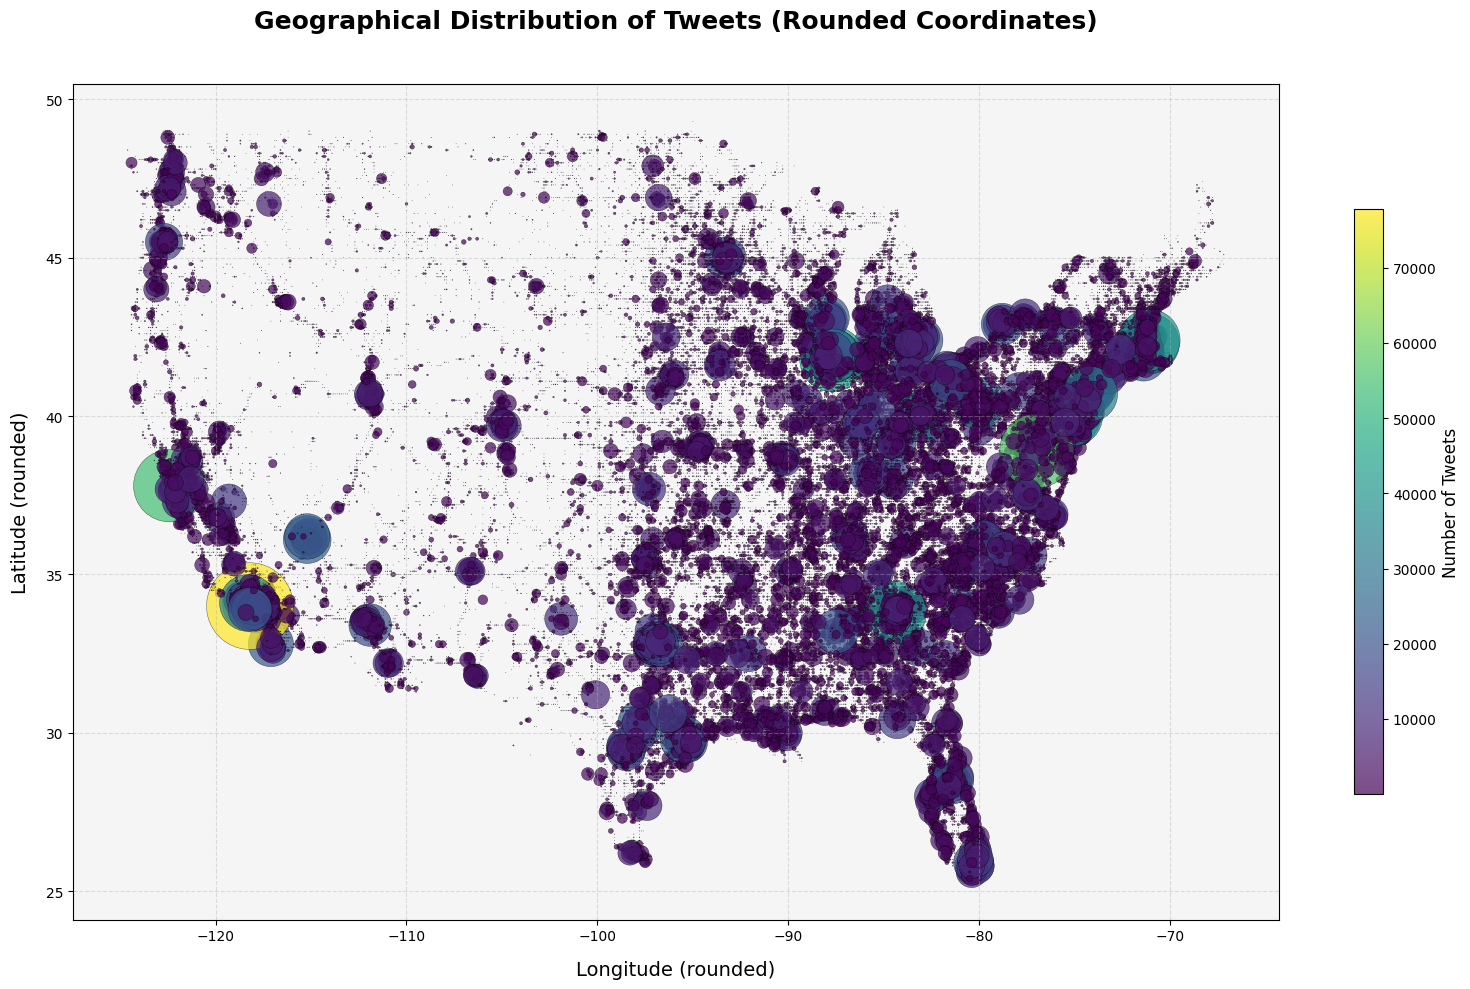

In [11]:
# Twitter Geographical Distribution Visualization
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 1. Load the data from Spark output
geo_files = glob.glob('./geo_results/part-*.csv')  # Update path if needed
geo_df = pd.concat([pd.read_csv(f) for f in geo_files])

# 2. Data preparation 
geo_df = geo_df.rename(columns={
    'lon_rounded': 'longitude',
    'lat_rounded': 'latitude',
    'tweet_count': 'count'})


plt.figure(figsize=(16, 10))
scatter = plt.scatter(
    x=geo_df['longitude'],
    y=geo_df['latitude'],
    s=geo_df['count']*0.05,  # Scale point size
    c=geo_df['count'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='black',
    linewidths=0.3)

plt.title('Geographical Distribution of Tweets (Rounded Coordinates)\n', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Longitude (rounded)', fontsize=14, labelpad=12)
plt.ylabel('Latitude (rounded)', fontsize=14, labelpad=12)

# Add colorbar
cbar = plt.colorbar(scatter, shrink=0.7)
cbar.set_label('Number of Tweets', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Add grid and styling
plt.grid(linestyle='--', alpha=0.4)
plt.gca().set_facecolor('#f5f5f5')

# Adjust layout and save
plt.tight_layout()
output_file = 'twitter_geographical_distribution_rounded.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Visualization saved to {output_file}")
plt.show()

In [2]:
!pip install pandas
!pip install matplotlib

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.

Visualization saved to twitter_time_of_day_activity.png


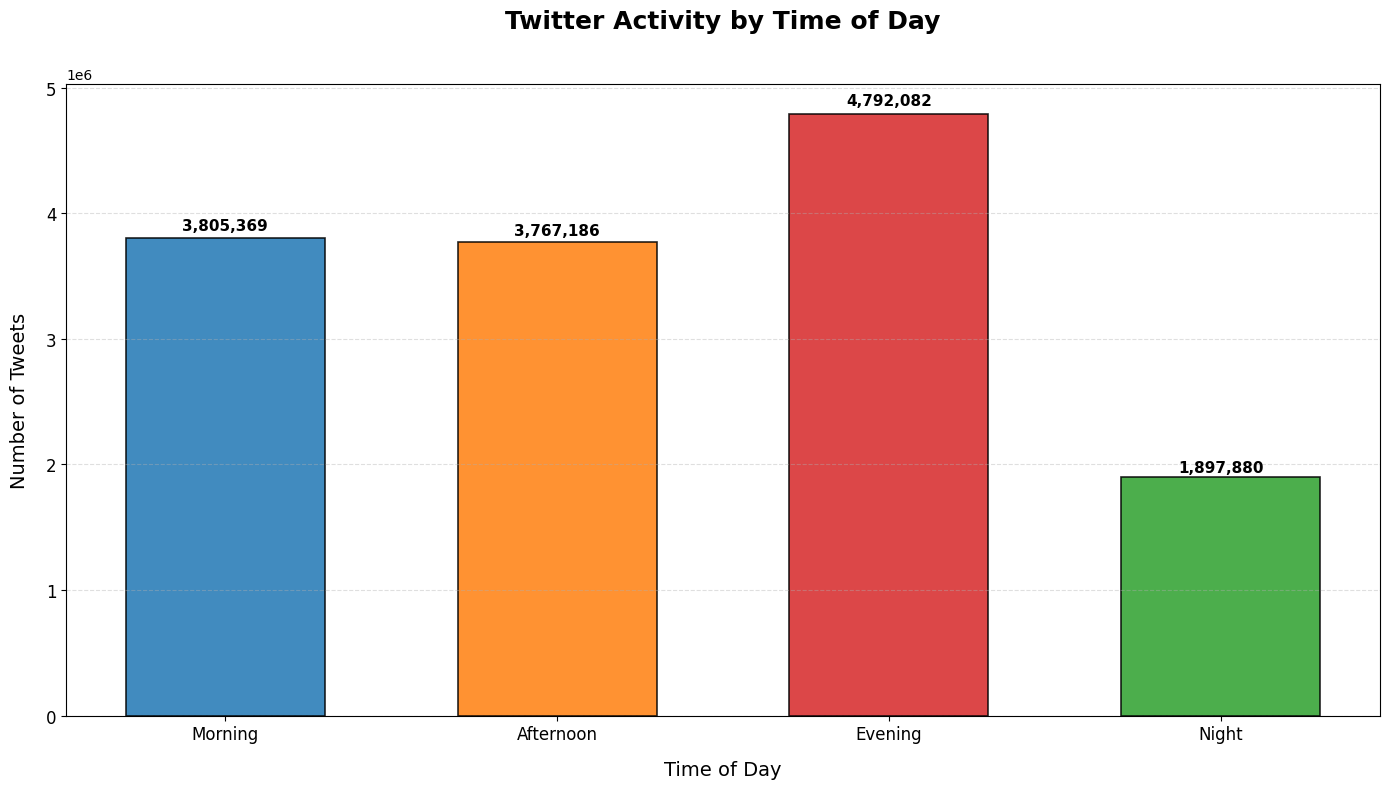

In [12]:
# Twitter Time of Day Activity Visualization
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 1. Load the data from Spark output
time_files = glob.glob('./td_results/part-*.csv')  
time_df = pd.concat([pd.read_csv(f) for f in time_files])

# 2. Data preparation
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_df['time_of_day'] = pd.Categorical(time_df['time_of_day'], categories=time_order,ordered=True)
time_df = time_df.sort_values('time_of_day')

# 3. Color scheme for each time period
color_palette = {
    'Morning': '#1f77b4',    # Blue for morning
    'Afternoon': '#ff7f0e',  # Orange for afternoon
    'Evening': '#d62728',    # Red for evening
    'Night': '#2ca02c'}       # Green for night

plt.figure(figsize=(14, 8))
bars = plt.bar(
    x=time_df['time_of_day'],
    height=time_df['count'],
    color=[color_palette[x] for x in time_df['time_of_day']],
    width=0.6,alpha=0.85,edgecolor='black',linewidth=1.2)

# Customize the chart
plt.title('Twitter Activity by Time of Day\n', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Time of Day', fontsize=14, labelpad=12)
plt.ylabel('Number of Tweets', fontsize=14, labelpad=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 
             height * 1.01,  # 1% above the bar
             f'{height:,}',  # Format with commas
             ha='center', 
             va='bottom',
             fontsize=11,
             fontweight='bold')

# Adjust layout and save
plt.tight_layout()
output_file = 'twitter_time_of_day_activity.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Visualization saved to {output_file}")
plt.show()

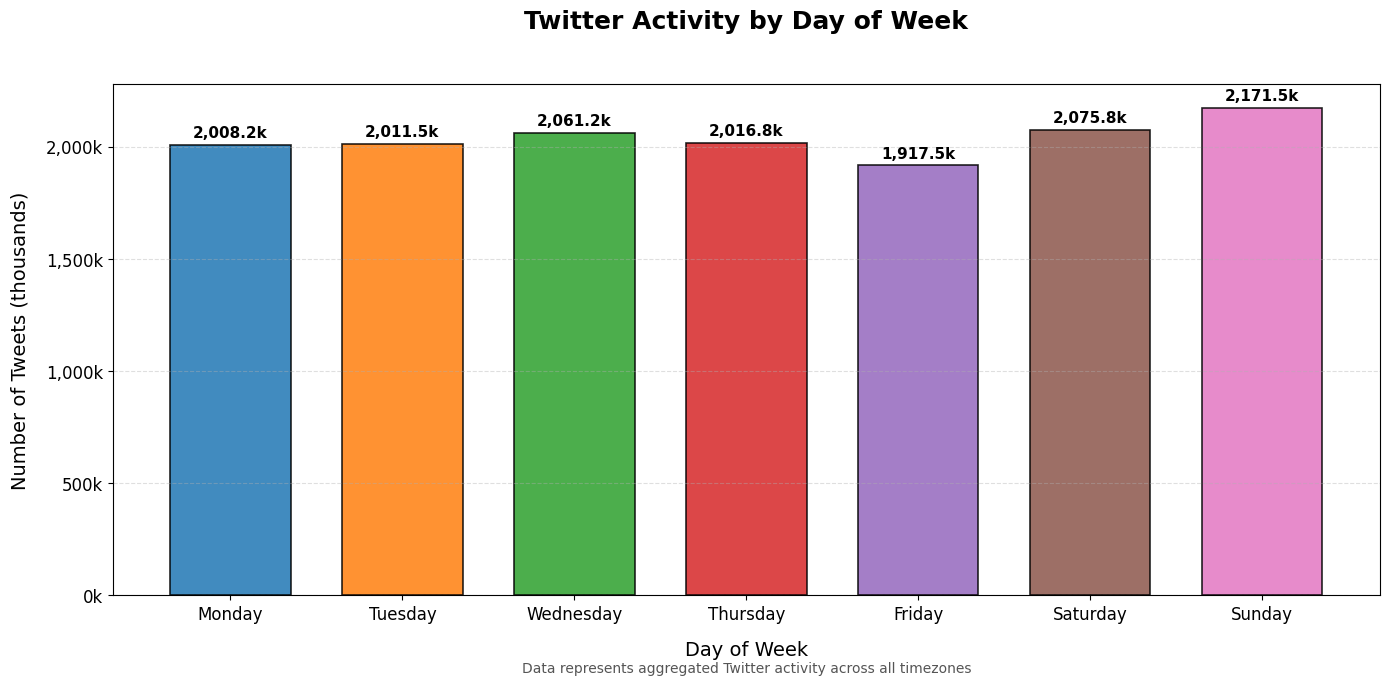

In [7]:
# Twitter Activity by Weekday Visualization
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 1. Load the data
df = pd.concat([pd.read_csv(f) for f in glob.glob('./daily_results/part-*.csv')])

# Convert day_of_week to string type if it's numeric
df['day_of_week'] = df['day_of_week'].astype(str)

# 2. Ensure proper day ordering
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
df = df.sort_values('day_of_week')

# 3. Color scheme for all 7 days
color_palette = [
    '#1f77b4',  # Monday - muted blue
    '#ff7f0e',  # Tuesday - safety orange
    '#2ca02c',  # Wednesday - cooked asparagus green
    '#d62728',  # Thursday - brick red
    '#9467bd',  # Friday - muted purple
    '#8c564b',  # Saturday - chestnut brown
    '#e377c2']   # Sunday - raspberry yogurt pink

plt.figure(figsize=(14, 7))
bars = plt.bar(
    x=df['day_of_week'],
    height=df['total_tweets'],
    color=color_palette,
    width=0.7,
    alpha=0.85,
    edgecolor='black',
    linewidth=1.2)

# Customize the chart
plt.title('Twitter Activity by Day of Week\n', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Day of Week', fontsize=14, labelpad=12)
plt.ylabel('Number of Tweets (thousands)', fontsize=14, labelpad=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels with improved formatting
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 
             height * 1.01,  # 1% above the bar
             f'{height/1000:,.1f}k',  # Format as thousands with one decimal
             ha='center', 
             va='bottom',
             fontsize=11,
             fontweight='bold')

# Add thousands indicator on y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}k".format(int(x/1000))))

# Adjust layout and save
plt.tight_layout()
plt.savefig('twitter_weekday_activity.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()